In [27]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imsave

# Load data

In [2]:
# load the fish movie
data_path = '../../data/original_files/'

frames = np.loadtxt(data_path + 'frames.csv', delimiter=',')
frames = frames.reshape(frames.shape[0], 120, 200)
print('frames.shape = {}'.format(frames.shape))

frames.shape = (1141, 120, 200)


# Create batches of frames

In [40]:
# Helper function to show a batch
def show_frames_batch(sample_batched):
    batch_size = len(sample_batched)
    for i in range(batch_size):
        plt.subplot(6, batch_size//6, i+1)
        plt.imshow(sample_batched[i,:,:], cmap='gray')
        plt.axis('off')
        plt.ioff()

(42, 120, 200)
frame indices:  tensor([-41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28,
        -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14,
        -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0],
       dtype=torch.int32)


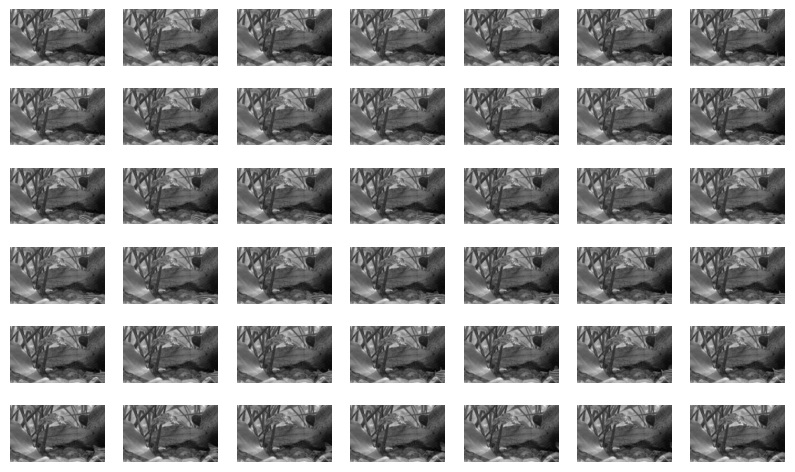

In [45]:
# example with only positive indices
# batch_ind = 1000
# batch_sz = 42
# idx = torch.arange(batch_ind-batch_sz+1, batch_ind+1, dtype=torch.int32)
# sample_batched = frames[idx]

# another example with negative indices
batch_ind = 0
batch_sz = 42
idx = torch.arange(batch_ind-batch_sz+1, batch_ind+1, dtype=torch.int32)
sample_batched = frames[idx]

print(sample_batched.shape)
print('frame indices: ', idx)
plt.figure(figsize=(10,6))
show_frames_batch(sample_batched)
plt.show()

# Save the batches as .png

In [47]:
res_path = '../../data/original_files/wrapped_frames/'
batch_sz = 42
num = 0
for batch_ind in range(42):
    idx = torch.arange(batch_ind-batch_sz+1, batch_ind+1, dtype=torch.int32)
    for index in idx:
        # img = Image.fromarray(frames[index])
        # img.save(res_path+'f_'+str(num)+'.png')
        imsave(res_path+'f_'+str(num)+'.png', frames[index], cmap='gray')
        num += 1